In [3]:
import pandas as pd

excel_file = '/content/Online Retail.xlsx'

# Lecture du fichier Excel dans un DataFrame pandas
df = pd.read_excel(excel_file)

# Affichez les 5 premières lignes du DataFrame
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Informations générales sur le dataset
df.info()
"""
  541 909 lignes
  8 colonnes
  Types mixtes (int, float, object)
"""

"""
  Explication des colonnes :
InvoiceNo	désigne le Numéro de facture, qui est une colonne de type object
StockCode, Code produit de type object
Description, Nom du produit de type	object
Quantity, colonne de type	int	qui désigne la Quantité achetée
InvoiceDate, représente les Dates & heures. Colonne de type object
UnitPrice	colonne de type float	qui represente le Prix unitaire
CustomerID	colonne de type float, qui indique l'ID client
Country c'est le Pays, colonne de type object
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


"\n  Explication des colonnes :\nInvoiceNo\tdésigne le Numéro de facture, qui est une colonne de type object\nStockCode, Code produit de type object\nDescription, Nom du produit de type\tobject\nQuantity, colonne de type\tint\tqui désigne la Quantité achetée\nInvoiceDate, représente les Dates & heures. Colonne de type object\nUnitPrice\tcolonne de type float\tqui represente le Prix unitaire\nCustomerID\tcolonne de type float, qui indique l'ID client\nCountry c'est le Pays, colonne de type object\n"

In [5]:
# Identifier les doublons
df.duplicated().sum()

# Afficher les doublons
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [6]:
"""
  Bien que plusieurs lignes partagent le même numéro de facture,
  celles-ci correspondent à des produits distincts au sein d’une même commande et ne constituent donc pas des doublons au sens métier
"""

"""
  Un doublon au sens data = deux lignes représentant exactement la même observation

Dans notre cas :

même InvoiceNo, yes

même CustomerID , yes

même InvoiceDate , yes

MAIS :

StockCode , no

Description , no

UnitPrice , no

Donc ce sont deux produits différents sur la même facture.
"""

"""
  Dans ce dataset, une ligne est unique par : InvoiceNo + StockCode

"""

'\n  Dans ce dataset, une ligne est unique par : InvoiceNo + StockCode\n\n'

In [7]:
df.duplicated(subset=["InvoiceNo", "StockCode"]).sum()
df[df.duplicated(subset=["InvoiceNo", "StockCode"], keep=False)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [8]:
df.describe()

#Valeur manquantes
df.isnull().sum()
"""
  CustomerID contient 135 080 valeurs manquantes (~25%).
  Cause métier connue : Clients non enregistrés, Commandes anonymes / visiteurs
  Description contient 1 454 valeurs manquantes.
"""



'\n  CustomerID contient 135 080 valeurs manquantes (~25%).\n  Cause métier connue : Clients non enregistrés, Commandes anonymes / visiteurs\n  Description contient 1 454 valeurs manquantes.\n'

In [9]:
# Gestion des prix invalides
# -----------------------------

df[df["UnitPrice"] <= 0]
df.loc[df["UnitPrice"] <= 0, "UnitPrice"] = 0


df[df["Quantity"] < 0]


#Conversion au format Date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [10]:
df[df["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
"""
Dans Quantity, on observe :

- des valeurs positives (ventes)

- des valeurs négatives (exemple : -80995)

- Etant dnnée qu'on est dans un contexte e-commerce :

on part du principe qu'une quantité négative correspond à un retour produit ou une annulation de commande.
Ce n’est PAS une erreur de saisie, c’est une information métier.
Et donc on ne va pas suppirmer les infos négatifs, ni remplacer car cela reviens à gongler artificiellement le CA et Transforme un retour en vente et ainsi falsifié les volumes
"""

"\nDans Quantity, on observe :\n\n- des valeurs positives (ventes)\n\n- des valeurs négatives (exemple : -80995)\n\n- Etant dnnée qu'on est dans un contexte e-commerce :\n\non part du principe qu'une quantité négative correspond à un retour produit ou une annulation de commande.\nCe n’est PAS une erreur de saisie, c’est une information métier.\nEt donc on ne va pas suppirmer les infos négatifs, ni remplacer car cela reviens à gongler artificiellement le CA et Transforme un retour en vente et ainsi falsifié les volumes\n"

In [12]:
#Création d'un type transaction

df["TransactionType"] = df["Quantity"].apply(
    lambda q: "Return" if q < 0 else "Sale"
)
#On parcourt chaque valeur de Quantity
#Si la quantité est négative ==> "Return"
#Sinon ==> "Sale"
df['TransactionType']


,TransactionType
0,Sale
1,Sale
2,Sale
3,Sale
4,Sale
...,...
541904,Sale
541905,Sale
541906,Sale
541907,Sale


In [13]:
#Traitement des valeurs manquantes

"""
  Ce qu'on constate c'est que on a :
  1 454 valeurs manquantes sur la colonne descriptive qui est une colonne non numérique
  Donc sont impact sur les métriques financière est faible
  Donc on a choisis de faire une imputation par valeur explicite.
  ça va nous Permetre de conserver toutes les transactions
  D'évite les erreurs lors des jointures produit.
  et également, Rendre visible l’incertitude (“Unknown”)

"""

"\n  Ce qu'on constate c'est que on a :\n  1 454 valeurs manquantes sur la colonne descriptive qui est une colonne non numérique\n  Donc sont impact sur les métriques financière est faible\n  Donc on a choisis de faire une imputation par valeur explicite.\n  ça va nous Permetre de conserver toutes les transactions\n  D'évite les erreurs lors des jointures produit.\n  et également, Rendre visible l’incertitude (“Unknown”)\n\n"

In [14]:
df["Description"] = df["Description"].fillna("Unknown Product")

In [ ]:
"""
  La colonne cusomerId contient 135 080 valeurs manquantes (~25%),
  ce qui présente un Problème critique pour l’analyse client Fréquent
  on va donc, Conserver les ventes tout en distinguant les clients anonymes
"""

"""
  CustomerID est censé être unique par client
  Une commande ne peut pas exister sans client
  Donc :Un CustomerID manquant n’est pas un “client inconnu”, mais plutot
  une donnée incomplète ou mal collectée.
"""

"""
  Mettre CustomerID = 0 et Fusionner des milliers de clients différents reviens à Crée un faux super-client
  Donc au final on aura une Fausse : RFM, fréquence, panier, rétention
"""

"""
 Donc, On conserve toutes les lignes,
 mais on interdit toute analyse client sur les lignes sans CustomerID, du moins on va séparé les clients avec un ID et les clients sans ID.
"""

'\n Donc, On conserve toutes les lignes,\n mais on interdit toute analyse client sur les lignes sans CustomerID, du moins on va séparé les clients avec un ID et les clients sans ID.\n'

In [15]:
#On crée un FLAG
df["IsIdentifiedCustomer"] = df["CustomerID"].notna()

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.651940,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,94.395273,1713.600303


In [16]:
#Chiffre d'affaire net
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
df['TotalAmount']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionType,IsIdentifiedCustomer,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Sale,True,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Sale,True,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Sale,True,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Sale,True,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Sale,True,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Sale,True,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Sale,True,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Sale,True,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Sale,True,16.60


In [18]:
#Identification des Outliers
###A faire !!

Q1 = df["UnitPrice"].quantile(0.25)
Q3 = df["UnitPrice"].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = df[(df["UnitPrice"] < lower_bound) | (df["UnitPrice"] > upper_bound)]

# Filtrer les outliers
df_clean = df[(df["UnitPrice"] >= lower_bound) & (df["UnitPrice"] <= upper_bound)]
df_clean

#telecharger le df_clean

df_clean.to_csv("donnees_nettoyees.csv", index=False)

In [21]:
import os

path = r"C:\Users\moina\OneDrive\Bureau\Ynov\EDA  COURS\Me"
os.makedirs(path, exist_ok=True)

df_clean.to_csv(
    os.path.join(path, "donnees_nettoyees.csv"),
    index=False
)



<Axes: title={'center': 'UnitPrice'}, xlabel='Description', ylabel='UnitPrice'>

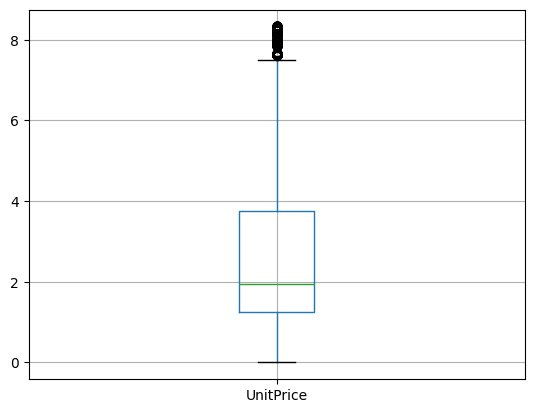

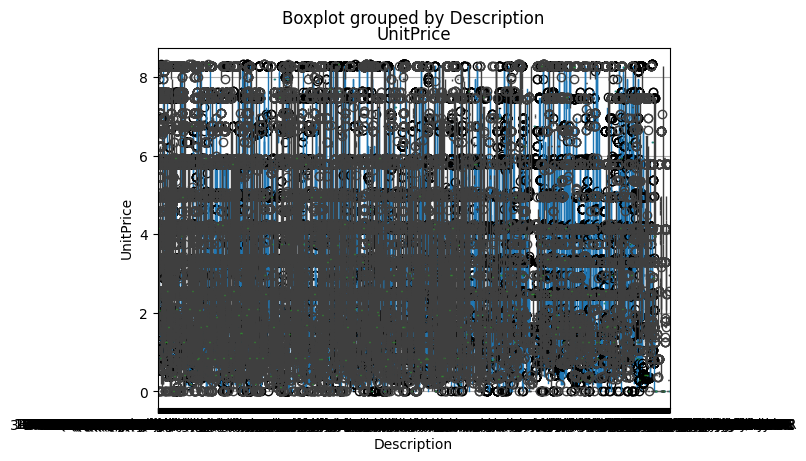

In [23]:
# Boxplot simple
df_clean.boxplot(column="UnitPrice")

# Boxplot par catégorie
df_clean.boxplot(column="UnitPrice", by="Description")

# Avec Seaborn
import seaborn as sns
# For a boxplot by category, 'Description' can be used on the x-axis.
# Note that plotting by all unique 'Description' values might result in a very dense plot.
sns.boxplot(data=df_clean, x="Description", y="UnitPrice")